In [2]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    fig = plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    s = '1011'
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


Secret string s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}
Most frequent measured bitstring (input register): 1101
⚠️ Measured string differs from s (noise or error).


Task 1: Change the Secret String 

{'1101': 1024}


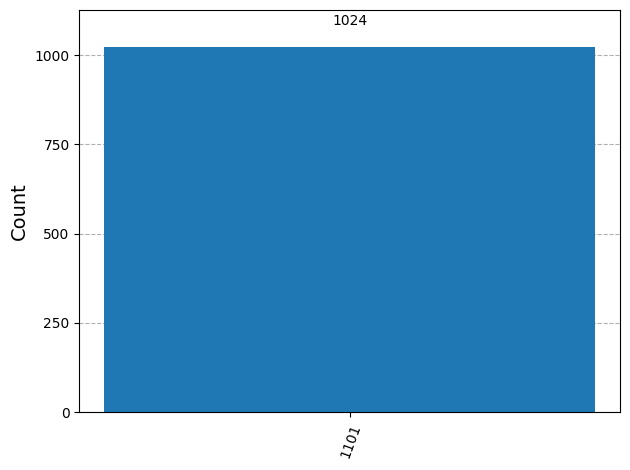

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Define secret string
s = "1011"
n = len(s)
s_bits = [int(bit) for bit in s]

qc = QuantumCircuit(n + 1, n)
qc.x(n)               # Prepare ancilla in |1>
qc.h(range(n + 1))    # Hadamard on all

# Oracle U_f for f(x) = s · x
for i, bit in enumerate(s_bits):
    if bit == 1:
        qc.cx(i, n)

qc.h(range(n))
qc.measure(range(n), range(n))

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
counts = backend.run(compiled, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

Task 2: Oracle with Constant Bit

{'0110': 1024}


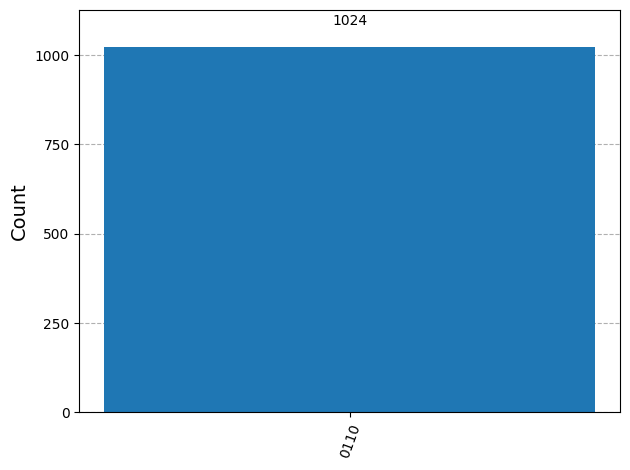

In [4]:
# Now make oracle for f(x) = s · x ⊕ b
s = "0110"
b = 1                   # Flip ancilla for constant term

n = len(s)
s_bits = [int(bit) for bit in s]

qc = QuantumCircuit(n + 1, n)
if b == 1:
    qc.x(n)             # Constant bit flip
qc.h(range(n + 1))

for i, bit in enumerate(s_bits):
    if bit == 1:
        qc.cx(i, n)

qc.h(range(n))
qc.measure(range(n), range(n))

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
counts = backend.run(compiled, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)

Task 3: Run on Real IBM Backend

{'1101': 1024}


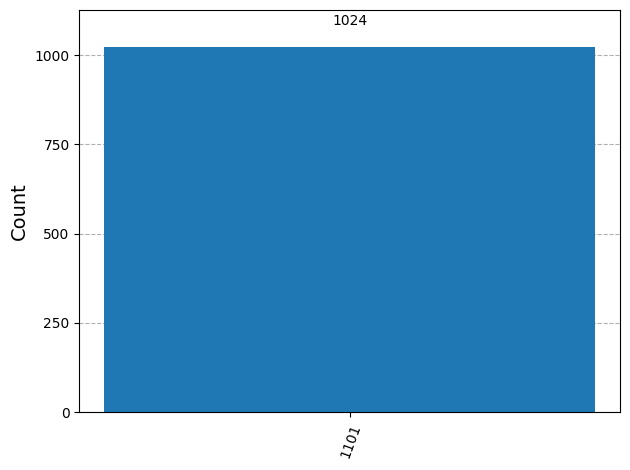

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Set secret string
s = "1011"
n = len(s)
s_bits = [int(bit) for bit in s]

qc = QuantumCircuit(n + 1, n)
qc.x(n)               # Prepare ancilla in |1>
qc.h(range(n + 1))    # Hadamard on all

# Oracle for f(x) = s · x
for i, bit in enumerate(s_bits):
    if bit == 1:
        qc.cx(i, n)

qc.h(range(n))
qc.measure(range(n), range(n))

# Simulate with Aer (NO IBM Quantum needed)
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
counts = backend.run(compiled, shots=1024).result().get_counts()
print(counts)
plot_histogram(counts)


Task 4: Add Noise via Aer NoiseModel

{'1101': 1024}


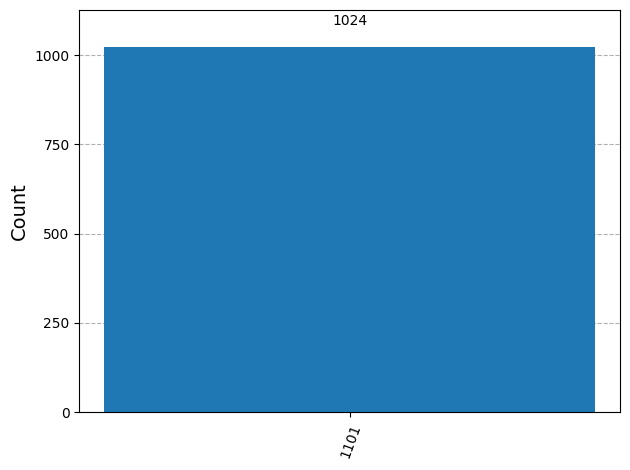

In [7]:
from qiskit_aer import noise

noise_model = noise.NoiseModel()
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, noise_model=noise_model, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Task 5:Bernstein–Vazirani Algorithm Step-by-Step

1. State Preparation

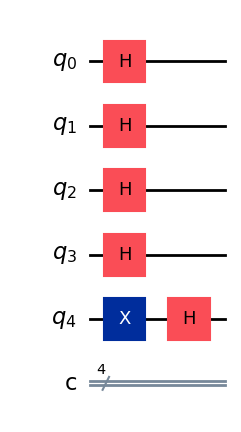

In [8]:
from qiskit import QuantumCircuit

s = "1011"           # Secret string
n = len(s)
qc = QuantumCircuit(n + 1, n)
qc.x(n)              # Flip ancilla to |1>
qc.h(range(n + 1))   # Hadamard on all qubits
qc.draw('mpl')

2. Oracle Construction

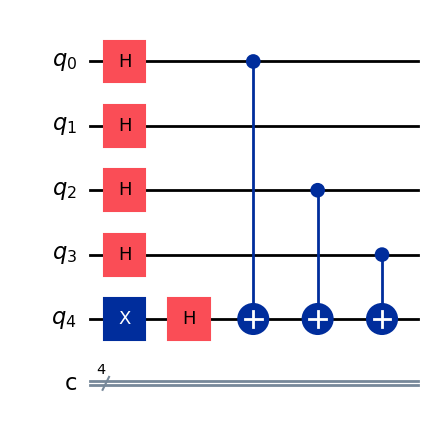

In [9]:
s_bits = [int(bit) for bit in s]
for i, bit in enumerate(s_bits):
    if bit == 1:
        qc.cx(i, n)  # Apply CNOT for each nonzero bit
qc.draw('mpl')

 3. Hadamard and Measurement

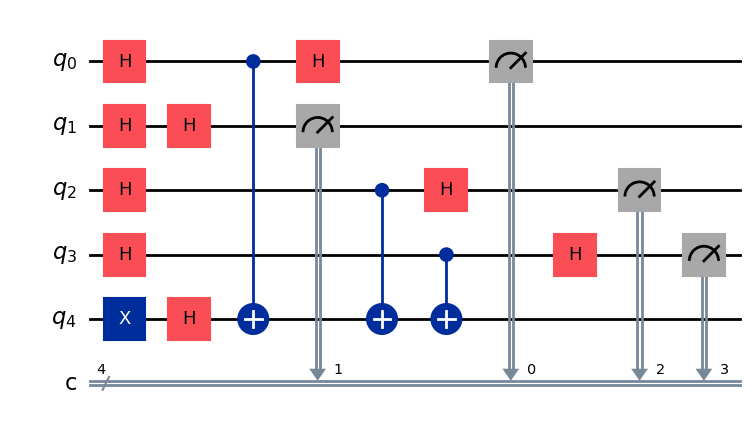

In [10]:
qc.h(range(n))            # Final Hadamard
qc.measure(range(n), range(n))
qc.draw('mpl')

4. Execution and Results

{'1101': 1024}


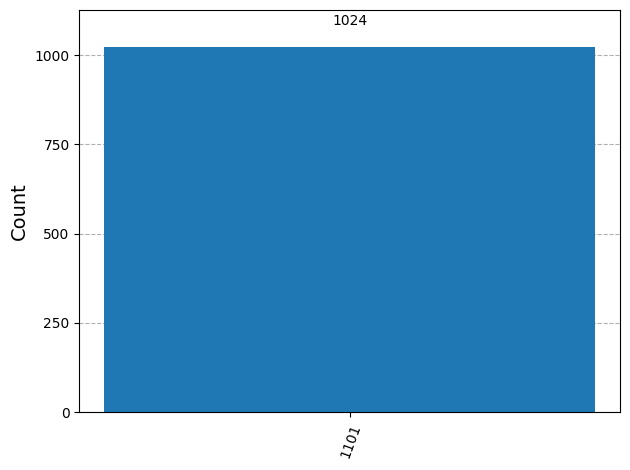

In [11]:
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
results = backend.run(compiled, shots=1024).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

5. Interpretation

The output histogram shows a strong peak at the bit-string matching \( s \), confirming successful recovery of the hidden string in a single quantum query.